In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

file_path = "../Resources/Original_Data.csv"
original_df = pd.read_csv(file_path)
original_df.head()


,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,...,sy_kepmag,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,1,2,...,NaN,2014-05-14,2008-01,2014-05-14,2,1,2,0,0,0
1,2,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,0,2,...,NaN,2014-07-23,2011-08,2014-07-23,2,1,2,0,0,0
2,3,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,0,1,...,NaN,2018-04-25 14:08:01,2011-08,2014-07-23,0,1,1,0,0,0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,...,NaN,2018-09-04 16:14:36,2017-03,2018-09-06,0,1,1,0,0,0
4,5,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,0,1,...,NaN,2018-04-25 14:08:01,2009-10,2014-05-14,0,1,1,0,0,0


In [55]:
project_data = original_df[["pl_name", "hostname", "disc_year", "sy_snum", "sy_pnum", "pl_rade", "pl_masse", "pl_dens", "pl_orbper", "pl_orbsmax", "pl_eqt", "st_teff", "st_rad", "st_mass", "st_dens", "sy_dist"]]
project_data.head()
project_data[project_data["sy_pnum"] >= 8]

,pl_name,hostname,disc_year,sy_snum,sy_pnum,pl_rade,pl_masse,pl_dens,pl_orbper,pl_orbsmax,pl_eqt,st_teff,st_rad,st_mass,st_dens,sy_dist
4191,KOI-351 b,KOI-351,2013,1,8,1.150,NaN,NaN,7.008281,0.0709,1061.0,6238.00,1.05,0.97,1.1823,848.254
4192,KOI-351 b,KOI-351,2013,1,8,1.290,NaN,NaN,7.008218,0.0738,1062.0,5970.00,1.20,1.09,1.0627,848.254
4193,KOI-351 b,KOI-351,2013,1,8,1.160,NaN,NaN,7.008233,0.0750,1056.0,6330.00,1.07,1.14,NaN,848.254
4194,KOI-351 b,KOI-351,2013,1,8,1.150,NaN,NaN,7.008281,0.0709,1061.0,6238.00,1.05,0.97,1.1823,848.254
4195,KOI-351 b,KOI-351,2013,1,8,1.310,NaN,NaN,7.008151,0.0740,NaN,6080.00,1.20,1.20,NaN,848.254
4196,KOI-351 b,KOI-351,2013,1,8,NaN,NaN,NaN,7.008235,NaN,NaN,6031.13,1.25,1.12,0.8129,848.254
4197,KOI-351 b,KOI-351,2013,1,8,1.302,NaN,NaN,NaN,NaN,NaN,6015.00,1.21,NaN,NaN,848.254
4198,KOI-351 c,KOI-351,2013,1,8,1.530,NaN,NaN,8.719801,0.0854,987.0,5970.00,1.20,1.09,1.2099,848.254
4199,KOI-351 c,KOI-351,2013,1,8,1.290,NaN,NaN,8.719829,0.0821,986.0,6238.00,1.05,0.97,1.4034,848.254
4200,KOI-351 c,KOI-351,2013,1,8,NaN,NaN,NaN,8.719759,NaN,NaN,6031.13,1.25,1.12,0.8129,848.254


In [3]:
no_dup_data = project_data.drop_duplicates(subset = ["pl_name", "hostname"])
no_dup_data

,pl_name,hostname,disc_year,sy_snum,sy_pnum,pl_rade,pl_masse,pl_dens,pl_orbper,pl_orbsmax,pl_eqt,st_teff,st_rad,st_mass,st_dens,sy_dist
0,11 Com b,11 Com,2007,2,1,NaN,NaN,NaN,326.030000,1.290000,NaN,4742.0,19.00,2.7,NaN,93.1846
2,11 UMi b,11 UMi,2009,1,1,NaN,NaN,NaN,NaN,1.510000,NaN,NaN,NaN,1.7,NaN,125.3210
5,14 And b,14 And,2008,1,1,NaN,NaN,NaN,185.840000,0.830000,NaN,4813.0,11.00,2.2,NaN,75.4392
7,14 Her b,14 Her,2002,1,1,NaN,NaN,NaN,NaN,2.730000,NaN,NaN,NaN,0.9,NaN,17.9323
13,16 Cyg B b,16 Cyg B,1996,3,1,NaN,NaN,NaN,800.800000,1.600000,NaN,5760.0,NaN,1.0,NaN,21.1397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26809,tau Gem b,tau Gem,2013,1,1,NaN,NaN,NaN,305.500000,1.170000,NaN,4388.0,26.80,2.3,NaN,112.5370
26811,ups And b,ups And,1996,2,3,NaN,NaN,NaN,4.617033,0.059222,NaN,NaN,1.56,1.3,NaN,13.4054
26816,ups And c,ups And,1999,2,3,NaN,NaN,NaN,238.100000,0.821000,NaN,NaN,NaN,NaN,NaN,13.4054
26820,ups And d,ups And,1999,2,3,NaN,NaN,NaN,1274.600000,2.510000,NaN,NaN,NaN,NaN,NaN,13.4054


In [5]:
rename_df = no_dup_data.rename(columns = {"pl_name": "Planet_Name", "hostname": "Star_Name", "disc_year": "Discover_Year", "sy_snum": "Number_of_Stars", "sy_pnum": "Number_of_Planets", "pl_rade": "Planet_Radius", "pl_masse": "Planet_Mass", "pl_dens": "Planet_Density", "pl_orbper": "Planet_Orbital_Period(Days)", "pl_orbsmax": "Planet_Orbital_Semi_Major_Axis(au)", "pl_eqt": "Planet_Equilibrium_Temp(K)", "st_teff": "Stellar_Effective_Temp(K)", "st_rad": "Stellar_Radius", "st_mass": "Stellar_Mass", "st_dens": "Stellar_Density", "sy_dist": "System_Distance(pc)"})
rename_df

,Planet_Name,Star_Name,Discover_Year,Number_of_Stars,Number_of_Planets,Planet_Radius,Planet_Mass,Planet_Density,Planet_Orbital_Period(Days),Planet_Orbital_Semi_Major_Axis(au),Planet_Equilibrium_Temp(K),Stellar_Effective_Temp(K),Stellar_Radius,Stellar_Mass,Stellar_Density,System_Distance(pc)
0,11 Com b,11 Com,2007,2,1,NaN,NaN,NaN,326.030000,1.290000,NaN,4742.0,19.00,2.7,NaN,93.1846
2,11 UMi b,11 UMi,2009,1,1,NaN,NaN,NaN,NaN,1.510000,NaN,NaN,NaN,1.7,NaN,125.3210
5,14 And b,14 And,2008,1,1,NaN,NaN,NaN,185.840000,0.830000,NaN,4813.0,11.00,2.2,NaN,75.4392
7,14 Her b,14 Her,2002,1,1,NaN,NaN,NaN,NaN,2.730000,NaN,NaN,NaN,0.9,NaN,17.9323
13,16 Cyg B b,16 Cyg B,1996,3,1,NaN,NaN,NaN,800.800000,1.600000,NaN,5760.0,NaN,1.0,NaN,21.1397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26809,tau Gem b,tau Gem,2013,1,1,NaN,NaN,NaN,305.500000,1.170000,NaN,4388.0,26.80,2.3,NaN,112.5370
26811,ups And b,ups And,1996,2,3,NaN,NaN,NaN,4.617033,0.059222,NaN,NaN,1.56,1.3,NaN,13.4054
26816,ups And c,ups And,1999,2,3,NaN,NaN,NaN,238.100000,0.821000,NaN,NaN,NaN,NaN,NaN,13.4054
26820,ups And d,ups And,1999,2,3,NaN,NaN,NaN,1274.600000,2.510000,NaN,NaN,NaN,NaN,NaN,13.4054


In [6]:
test_df = rename_df.dropna()
test_df

,Planet_Name,Star_Name,Discover_Year,Number_of_Stars,Number_of_Planets,Planet_Radius,Planet_Mass,Planet_Density,Planet_Orbital_Period(Days),Planet_Orbital_Semi_Major_Axis(au),Planet_Equilibrium_Temp(K),Stellar_Effective_Temp(K),Stellar_Radius,Stellar_Mass,Stellar_Density,System_Distance(pc)
160,CoRoT-10 b,CoRoT-10,2010,1,1,10.548,883.56740,4.1600,13.240600,0.10600,647.0,5075.0,0.74,0.90,3.1000,338.386
168,CoRoT-12 b,CoRoT-12,2010,1,1,15.132,281.91521,0.4480,2.828042,0.03940,1410.0,5675.0,1.05,1.02,1.2500,1126.370
175,CoRoT-14 b,CoRoT-14,2010,1,1,11.411,2437.75610,9.0000,1.512140,0.02687,1936.0,6035.0,1.19,1.12,0.9400,1744.600
180,CoRoT-17 b,CoRoT-17,2011,1,1,11.287,781.86180,3.0058,3.768100,0.04810,1610.0,5740.0,1.62,1.04,0.3420,1176.120
206,CoRoT-22 b,CoRoT-22,2014,1,1,4.880,12.20000,0.2490,9.755980,0.09200,885.0,5939.0,1.14,1.10,1.0270,627.158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26660,WASP-94 A b,WASP-94 A,2014,2,2,19.280,143.65300,0.1180,3.950191,0.05500,1604.0,6153.0,1.62,1.45,0.4850,211.211
26669,WASP-97 b,WASP-97,2014,1,1,12.670,419.52000,1.2100,2.072760,0.03303,1555.0,5640.0,1.06,1.12,1.3100,151.068
26682,WTS-1 b,WTS-1,2012,1,1,16.700,1274.44000,1.6100,3.352057,0.04700,1500.0,6250.0,1.15,1.20,1.1129,2346.010
26732,XO-5 b,XO-5,2008,1,1,12.780,378.20000,1.0600,4.187756,0.05150,1230.0,5430.0,1.13,1.04,1.0100,276.211


In [7]:
def earthradius(x):
    km = x * 6371
    return km
test_df['Planet_Radius (km)'] = test_df['Planet_Radius'].apply(earthradius)

test_df

C:\Users\staff\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Planet_Name,Star_Name,Discover_Year,Number_of_Stars,Number_of_Planets,Planet_Radius,Planet_Mass,Planet_Density,Planet_Orbital_Period(Days),Planet_Orbital_Semi_Major_Axis(au),Planet_Equilibrium_Temp(K),Stellar_Effective_Temp(K),Stellar_Radius,Stellar_Mass,Stellar_Density,System_Distance(pc),Planet_Radius (km)
160,CoRoT-10 b,CoRoT-10,2010,1,1,10.548,883.56740,4.1600,13.240600,0.10600,647.0,5075.0,0.74,0.90,3.1000,338.386,67201.308
168,CoRoT-12 b,CoRoT-12,2010,1,1,15.132,281.91521,0.4480,2.828042,0.03940,1410.0,5675.0,1.05,1.02,1.2500,1126.370,96405.972
175,CoRoT-14 b,CoRoT-14,2010,1,1,11.411,2437.75610,9.0000,1.512140,0.02687,1936.0,6035.0,1.19,1.12,0.9400,1744.600,72699.481
180,CoRoT-17 b,CoRoT-17,2011,1,1,11.287,781.86180,3.0058,3.768100,0.04810,1610.0,5740.0,1.62,1.04,0.3420,1176.120,71909.477
206,CoRoT-22 b,CoRoT-22,2014,1,1,4.880,12.20000,0.2490,9.755980,0.09200,885.0,5939.0,1.14,1.10,1.0270,627.158,31090.480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26660,WASP-94 A b,WASP-94 A,2014,2,2,19.280,143.65300,0.1180,3.950191,0.05500,1604.0,6153.0,1.62,1.45,0.4850,211.211,122832.880
26669,WASP-97 b,WASP-97,2014,1,1,12.670,419.52000,1.2100,2.072760,0.03303,1555.0,5640.0,1.06,1.12,1.3100,151.068,80720.570
26682,WTS-1 b,WTS-1,2012,1,1,16.700,1274.44000,1.6100,3.352057,0.04700,1500.0,6250.0,1.15,1.20,1.1129,2346.010,106395.700
26732,XO-5 b,XO-5,2008,1,1,12.780,378.20000,1.0600,4.187756,0.05150,1230.0,5430.0,1.13,1.04,1.0100,276.211,81421.380


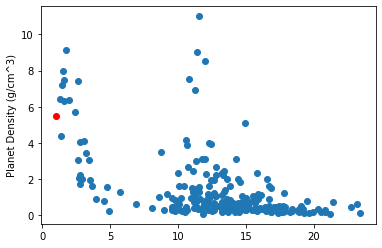

In [8]:

plt.scatter(test_df["Planet_Radius"],test_df["Planet_Density"])
plt.ylabel("Planet Density (g/cm^3)")
plt.plot(1, 5.51, "ro")
plt.show()

In [9]:
def terestrial(dens , mass):
    if dens > 5 and mass < 17.15:
        value = True
    else:
        value = False
    return value
        

In [10]:
good = []
for n in range(227):
     density = test_df.iloc[n, 7]
     mass = test_df.iloc[n,6]
     value = terestrial(density, mass)
     good.append(value)


test_df["good"] = good
test_df

C:\Users\staff\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Planet_Name,Star_Name,Discover_Year,Number_of_Stars,Number_of_Planets,Planet_Radius,Planet_Mass,Planet_Density,Planet_Orbital_Period(Days),Planet_Orbital_Semi_Major_Axis(au),Planet_Equilibrium_Temp(K),Stellar_Effective_Temp(K),Stellar_Radius,Stellar_Mass,Stellar_Density,System_Distance(pc),Planet_Radius (km),good
160,CoRoT-10 b,CoRoT-10,2010,1,1,10.548,883.56740,4.1600,13.240600,0.10600,647.0,5075.0,0.74,0.90,3.1000,338.386,67201.308,False
168,CoRoT-12 b,CoRoT-12,2010,1,1,15.132,281.91521,0.4480,2.828042,0.03940,1410.0,5675.0,1.05,1.02,1.2500,1126.370,96405.972,False
175,CoRoT-14 b,CoRoT-14,2010,1,1,11.411,2437.75610,9.0000,1.512140,0.02687,1936.0,6035.0,1.19,1.12,0.9400,1744.600,72699.481,False
180,CoRoT-17 b,CoRoT-17,2011,1,1,11.287,781.86180,3.0058,3.768100,0.04810,1610.0,5740.0,1.62,1.04,0.3420,1176.120,71909.477,False
206,CoRoT-22 b,CoRoT-22,2014,1,1,4.880,12.20000,0.2490,9.755980,0.09200,885.0,5939.0,1.14,1.10,1.0270,627.158,31090.480,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26660,WASP-94 A b,WASP-94 A,2014,2,2,19.280,143.65300,0.1180,3.950191,0.05500,1604.0,6153.0,1.62,1.45,0.4850,211.211,122832.880,False
26669,WASP-97 b,WASP-97,2014,1,1,12.670,419.52000,1.2100,2.072760,0.03303,1555.0,5640.0,1.06,1.12,1.3100,151.068,80720.570,False
26682,WTS-1 b,WTS-1,2012,1,1,16.700,1274.44000,1.6100,3.352057,0.04700,1500.0,6250.0,1.15,1.20,1.1129,2346.010,106395.700,False
26732,XO-5 b,XO-5,2008,1,1,12.780,378.20000,1.0600,4.187756,0.05150,1230.0,5430.0,1.13,1.04,1.0100,276.211,81421.380,False


In [11]:
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l== True:
            cols.append('blue')
        elif l== False:
            cols.append('gray')
    return cols

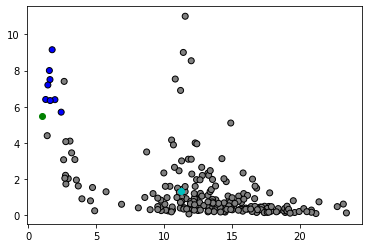

In [56]:
cols = pltcolor(good)
plt.scatter(test_df["Planet_Radius"],test_df["Planet_Density"], c = cols, edgecolor = "black")
plt.plot(1, 5.51, "go")
plt.plot(11.2089 , 1.33, "co" )

In [13]:
solar = original_df[["hostname", "sy_snum", "st_dens","st_age", "st_rad", "st_teff", "st_mass", "st_met", "st_vsin", "st_lum", "st_metratio"]]
test_solar = solar.drop_duplicates(subset = ["hostname"]).dropna()
test_solar

,hostname,sy_snum,st_dens,st_age,st_rad,st_teff,st_mass,st_met,st_vsin,st_lum,st_metratio
341,EPIC 246851721,2,0.4650,3.020,1.59,6202.0,1.32,0.141,74.92,0.526,[Fe/H]
347,G 9-40,1,14.1100,9.900,0.31,3348.0,0.29,0.040,2.00,-1.971,[Fe/H]
815,HAT-P-51,1,1.2230,8.200,1.04,5449.0,0.98,0.270,1.70,-0.066,[Fe/H]
820,HAT-P-53,1,0.8700,4.670,1.21,5956.0,1.09,0.000,4.10,0.217,[Fe/H]
834,HAT-P-57,3,0.6150,1.000,1.50,7500.0,1.47,-0.250,102.10,0.806,[Fe/H]
...,...,...,...,...,...,...,...,...,...,...,...
25955,TOI-157,1,0.8420,12.820,1.17,5404.0,0.95,0.240,2.50,0.020,[Fe/H]
25957,TOI-163,1,0.4518,1.823,1.65,6495.0,1.44,0.220,14.08,0.636,[Fe/H]
25959,TOI-169,1,0.7560,4.700,1.29,5880.0,1.15,0.240,2.50,0.253,[Fe/H]
25960,TOI-172,1,0.2860,7.400,1.78,5645.0,1.13,0.148,5.10,0.461,[Fe/H]


In [47]:
def linear_regression(x, y, x_label, y_label, title, a, b):
    plt.scatter(x, y, edgecolor = "black")
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    plt.plot(x, slope*x + intercept, "r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.annotate("Slope is " + str(slope), (a,b), xycoords = 'axes fraction')
    
    plt.show

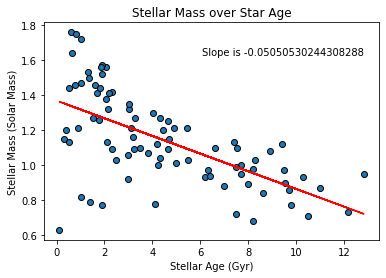

In [48]:
better = test_solar[test_solar["st_mass"] >= .4]
linear_regression(better["st_age"], better["st_mass"], "Stellar Age (Gyr)", "Stellar Mass (Solar Mass)", "Stellar Mass over Star Age", .47, .85)


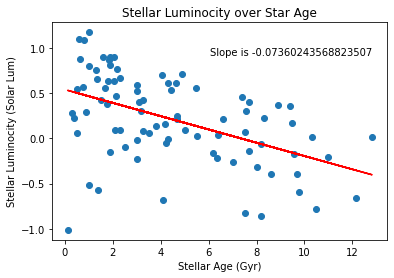

In [16]:
linear_regression(better["st_age"], better["st_lum"], "Stellar Age (Gyr)", "Stellar Luminocity (Solar Lum)", "Stellar Luminocity over Star Age", .47, .85)


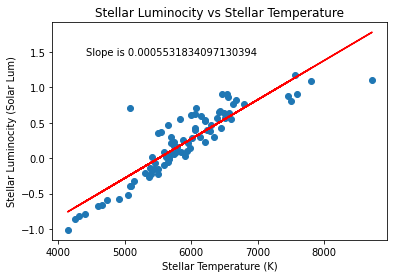

In [17]:
linear_regression(better["st_teff"], better["st_lum"], "Stellar Temperature (K)", "Stellar Luminocity (Solar Lum)", "Stellar Luminocity vs Stellar Temperature", .1, .85)

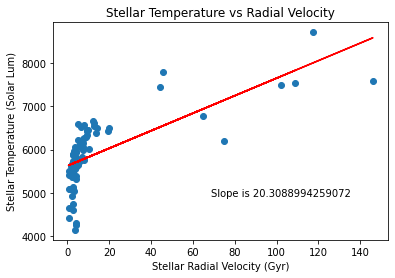

In [18]:
linear_regression(better["st_vsin"], better["st_teff"], "Stellar Radial Velocity (Gyr)", "Stellar Temperature (Solar Lum)", "Stellar Temperature vs Radial Velocity", .47, .2)

In [19]:
rename_df

,Planet_Name,Star_Name,Discover_Year,Number_of_Stars,Number_of_Planets,Planet_Radius,Planet_Mass,Planet_Density,Planet_Orbital_Period(Days),Planet_Orbital_Semi_Major_Axis(au),Planet_Equilibrium_Temp(K),Stellar_Effective_Temp(K),Stellar_Radius,Stellar_Mass,Stellar_Density,System_Distance(pc)
0,11 Com b,11 Com,2007,2,1,NaN,NaN,NaN,326.030000,1.290000,NaN,4742.0,19.00,2.7,NaN,93.1846
2,11 UMi b,11 UMi,2009,1,1,NaN,NaN,NaN,NaN,1.510000,NaN,NaN,NaN,1.7,NaN,125.3210
5,14 And b,14 And,2008,1,1,NaN,NaN,NaN,185.840000,0.830000,NaN,4813.0,11.00,2.2,NaN,75.4392
7,14 Her b,14 Her,2002,1,1,NaN,NaN,NaN,NaN,2.730000,NaN,NaN,NaN,0.9,NaN,17.9323
13,16 Cyg B b,16 Cyg B,1996,3,1,NaN,NaN,NaN,800.800000,1.600000,NaN,5760.0,NaN,1.0,NaN,21.1397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26809,tau Gem b,tau Gem,2013,1,1,NaN,NaN,NaN,305.500000,1.170000,NaN,4388.0,26.80,2.3,NaN,112.5370
26811,ups And b,ups And,1996,2,3,NaN,NaN,NaN,4.617033,0.059222,NaN,NaN,1.56,1.3,NaN,13.4054
26816,ups And c,ups And,1999,2,3,NaN,NaN,NaN,238.100000,0.821000,NaN,NaN,NaN,NaN,NaN,13.4054
26820,ups And d,ups And,1999,2,3,NaN,NaN,NaN,1274.600000,2.510000,NaN,NaN,NaN,NaN,NaN,13.4054


In [37]:
def binning(define, output, labels):
    decimal = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
    n = 0
    for point in decimal:
        quart = define.quantile(point)
        input = round(quart, 2)
        output.append(input)
        label =  str(output[n]) + " to " + str(output[n+1])
        n=n+1
        labels.append(label)
    return output

In [38]:
tst = [0]
bins = []
binning(test_df["Stellar_Mass"], tst, bins)

[0, 0.78, 0.88, 0.95, 1.02, 1.08, 1.13, 1.21, 1.32, 1.45, 2.07]

In [39]:


test_df["bins"] = pd.cut(test_df["Stellar_Mass"], tst, labels = bins)
test_df

C:\Users\staff\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Planet_Name,Star_Name,Discover_Year,Number_of_Stars,Number_of_Planets,Planet_Radius,Planet_Mass,Planet_Density,Planet_Orbital_Period(Days),Planet_Orbital_Semi_Major_Axis(au),Planet_Equilibrium_Temp(K),Stellar_Effective_Temp(K),Stellar_Radius,Stellar_Mass,Stellar_Density,System_Distance(pc),Planet_Radius (km),good,bins
160,CoRoT-10 b,CoRoT-10,2010,1,1,10.548,883.56740,4.1600,13.240600,0.10600,647.0,5075.0,0.74,0.90,3.1000,338.386,67201.308,False,0.88 to 0.95
168,CoRoT-12 b,CoRoT-12,2010,1,1,15.132,281.91521,0.4480,2.828042,0.03940,1410.0,5675.0,1.05,1.02,1.2500,1126.370,96405.972,False,0.95 to 1.02
175,CoRoT-14 b,CoRoT-14,2010,1,1,11.411,2437.75610,9.0000,1.512140,0.02687,1936.0,6035.0,1.19,1.12,0.9400,1744.600,72699.481,False,1.08 to 1.13
180,CoRoT-17 b,CoRoT-17,2011,1,1,11.287,781.86180,3.0058,3.768100,0.04810,1610.0,5740.0,1.62,1.04,0.3420,1176.120,71909.477,False,1.02 to 1.08
206,CoRoT-22 b,CoRoT-22,2014,1,1,4.880,12.20000,0.2490,9.755980,0.09200,885.0,5939.0,1.14,1.10,1.0270,627.158,31090.480,False,1.08 to 1.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26660,WASP-94 A b,WASP-94 A,2014,2,2,19.280,143.65300,0.1180,3.950191,0.05500,1604.0,6153.0,1.62,1.45,0.4850,211.211,122832.880,False,1.32 to 1.45
26669,WASP-97 b,WASP-97,2014,1,1,12.670,419.52000,1.2100,2.072760,0.03303,1555.0,5640.0,1.06,1.12,1.3100,151.068,80720.570,False,1.08 to 1.13
26682,WTS-1 b,WTS-1,2012,1,1,16.700,1274.44000,1.6100,3.352057,0.04700,1500.0,6250.0,1.15,1.20,1.1129,2346.010,106395.700,False,1.13 to 1.21
26732,XO-5 b,XO-5,2008,1,1,12.780,378.20000,1.0600,4.187756,0.05150,1230.0,5430.0,1.13,1.04,1.0100,276.211,81421.380,False,1.02 to 1.08


In [51]:
test2_df = test_df.groupby(["bins", "Number_of_Planets"]).count()
test3_df = test2_df.dropna()
test3_df

Planet_Name  Star_Name  Discover_Year  \
bins         Number_of_Planets                                          
0 to 0.78    1                         20.0       20.0           20.0   
             2                          2.0        2.0            2.0   
             3                          1.0        1.0            1.0   
             4                          2.0        2.0            2.0   
0.78 to 0.88 1                         14.0       14.0           14.0   
             2                          4.0        4.0            4.0   
             3                          1.0        1.0            1.0   
             4                          2.0        2.0            2.0   
             6                          1.0        1.0            1.0   
0.88 to 0.95 1                         21.0       21.0           21.0   
             2                          2.0        2.0            2.0   
             6                          1.0        1.0            1.0   
0.95 to 1.02 1                         21.0       21.0           21.0   
1.02 to 1.08 1                         20.0       20.0           20.0   
             2                          2.0        2.0            2.0   
             3                          3.0        3.0            3.0   
1.08 to 1.13 1                         24.0       24.0           24.0   
1.13 to 1.21 1                         19.0       19.0           19.0   
             2                          2.0        2.0            2.0   
1.21 to 1.32 1                         20.0       20.0           20.0   
1.32 to 1.45 1                         21.0       21.0           21.0   
             2                          1.0        1.0            1.0   
1.45 to 2.07 1                         23.0       23.0           23.0   

                                Number_of_Stars  Planet_Radius  Planet_Mass  \
bins         Number_of_Planets                                                
0 to 0.78    1                             20.0           20.0         20.0   
             2                              2.0            2.0          2.0   
             3                              1.0            1.0          1.0   
             4                              2.0            2.0          2.0   
0.78 to 0.88 1                             14.0           14.0         14.0   
             2                              4.0            4.0          4.0   
             3                              1.0            1.0          1.0   
             4                              2.0            2.0          2.0   
             6                              1.0            1.0          1.0   
0.88 to 0.95 1                             21.0           21.0         21.0   
             2                              2.0            2.0          2.0   
             6                              1.0            1.0          1.0   
0.95 to 1.02 1                             21.0           21.0         21.0   
1.02 to 1.08 1                             20.0           20.0         20.0   
             2                              2.0            2.0          2.0   
             3                              3.0            3.0          3.0   
1.08 to 1.13 1                             24.0           24.0         24.0   
1.13 to 1.21 1                             19.0           19.0         19.0   
             2                              2.0            2.0          2.0   
1.21 to 1.32 1                             20.0           20.0         20.0   
1.32 to 1.45 1                             21.0           21.0         21.0   
             2                              1.0            1.0          1.0   
1.45 to 2.07 1                             23.0           23.0         23.0   

                                Planet_Density  Planet_Orbital_Period(Days)  \
bins         Number_of_Planets                                                
0 to 0.78    1                            20.0                         2

Text(0.5, 1.0, 'Number of Systems by Stellar Mass')

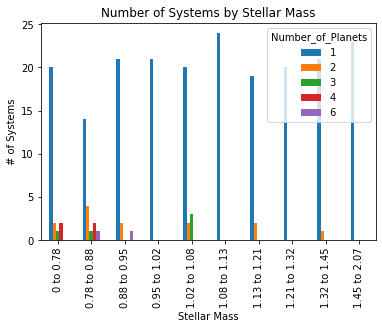

In [46]:
test3_df.unstack().plot.bar( y = "Star_Name")
plt.xlabel("Stellar Mass")
plt.ylabel("# of Systems")
plt.title("Number of Systems by Stellar Mass")